Jaisriram

In [13]:
import numpy as np
import pandas as pd
import os
import seaborn as sn
import matplotlib.pyplot as plt

In [14]:
ds = pd.read_csv('lungcancerpatients.csv')

In [15]:
ds.head(10)

,index,Patient Id,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,...,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level
0,0,P1,33,1,2,4,5,4,3,2,...,3,4,2,2,3,1,2,3,4,Low
1,1,P10,17,1,3,1,5,3,4,2,...,1,3,7,8,6,2,1,7,2,Medium
2,2,P100,35,1,4,5,6,5,5,4,...,8,7,9,2,1,4,6,7,2,High
3,3,P1000,37,1,7,7,7,7,6,7,...,4,2,3,1,4,5,6,7,5,High
4,4,P101,46,1,6,8,7,7,7,6,...,3,2,4,1,4,2,4,2,3,High
5,5,P102,35,1,4,5,6,5,5,4,...,8,7,9,2,1,4,6,7,2,High
6,6,P103,52,2,2,4,5,4,3,2,...,3,4,2,2,3,1,2,3,4,Low
7,7,P104,28,2,3,1,4,3,2,3,...,3,2,2,4,2,2,3,4,3,Low
8,8,P105,35,2,4,5,6,5,6,5,...,1,4,3,2,4,6,2,4,1,Medium
9,9,P106,46,1,2,3,4,2,4,3,...,1,2,4,6,5,4,2,1,5,Medium


In [16]:
ds.drop(["index", "Patient Id"], axis=1, inplace = True)
ds.head(5)

,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,Balanced Diet,Obesity,...,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level
0,33,1,2,4,5,4,3,2,2,4,...,3,4,2,2,3,1,2,3,4,Low
1,17,1,3,1,5,3,4,2,2,2,...,1,3,7,8,6,2,1,7,2,Medium
2,35,1,4,5,6,5,5,4,6,7,...,8,7,9,2,1,4,6,7,2,High
3,37,1,7,7,7,7,6,7,7,7,...,4,2,3,1,4,5,6,7,5,High
4,46,1,6,8,7,7,7,6,7,7,...,3,2,4,1,4,2,4,2,3,High


In [17]:
ds.dtypes

Age                          int64
Gender                       int64
Air Pollution                int64
Alcohol use                  int64
Dust Allergy                 int64
OccuPational Hazards         int64
Genetic Risk                 int64
chronic Lung Disease         int64
Balanced Diet                int64
Obesity                      int64
Smoking                      int64
Passive Smoker               int64
Chest Pain                   int64
Coughing of Blood            int64
Fatigue                      int64
Weight Loss                  int64
Shortness of Breath          int64
Wheezing                     int64
Swallowing Difficulty        int64
Clubbing of Finger Nails     int64
Frequent Cold                int64
Dry Cough                    int64
Snoring                      int64
Level                       object
dtype: object

In [18]:

shape = ds.shape

data_types = ds.dtypes

missing_values = ds.isnull().sum()

shape, data_types, missing_values

((1000, 24),
 Age                          int64
 Gender                       int64
 Air Pollution                int64
 Alcohol use                  int64
 Dust Allergy                 int64
 OccuPational Hazards         int64
 Genetic Risk                 int64
 chronic Lung Disease         int64
 Balanced Diet                int64
 Obesity                      int64
 Smoking                      int64
 Passive Smoker               int64
 Chest Pain                   int64
 Coughing of Blood            int64
 Fatigue                      int64
 Weight Loss                  int64
 Shortness of Breath          int64
 Wheezing                     int64
 Swallowing Difficulty        int64
 Clubbing of Finger Nails     int64
 Frequent Cold                int64
 Dry Cough                    int64
 Snoring                      int64
 Level                       object
 dtype: object,
 Age                         0
 Gender                      0
 Air Pollution               0
 Alcohol use  

In [27]:
ds=ds.replace({'Level':{'Low': 1, 'Medium': 2, 'High': 3}})

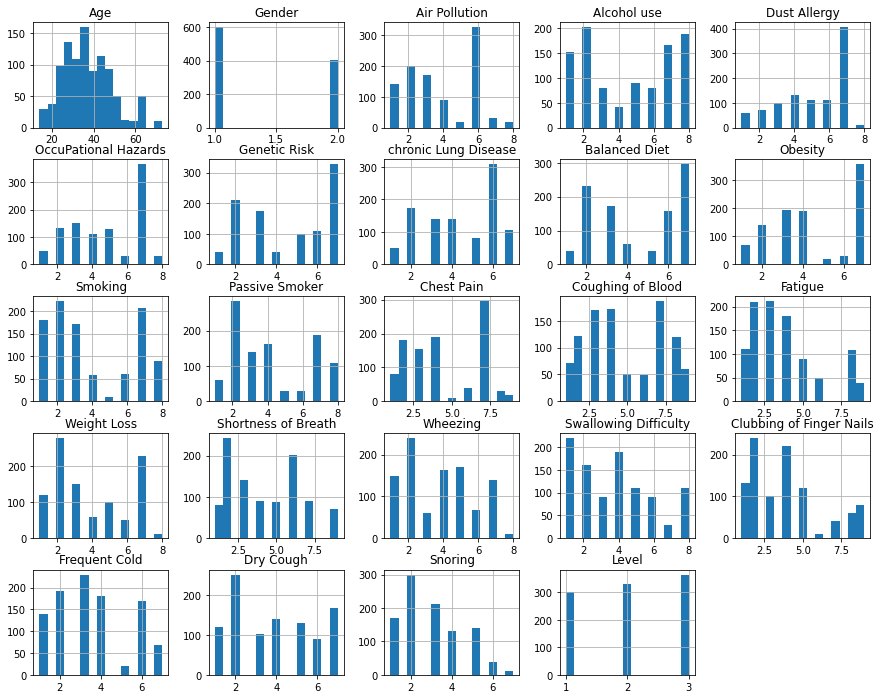

In [28]:
import matplotlib.pyplot as plt

ds.hist(figsize=(15,12),bins = 15)
plt.title("Features Distribution")
plt.show()

Text(0.5, 1.0, 'Correlation Matrix of Numerical Features')

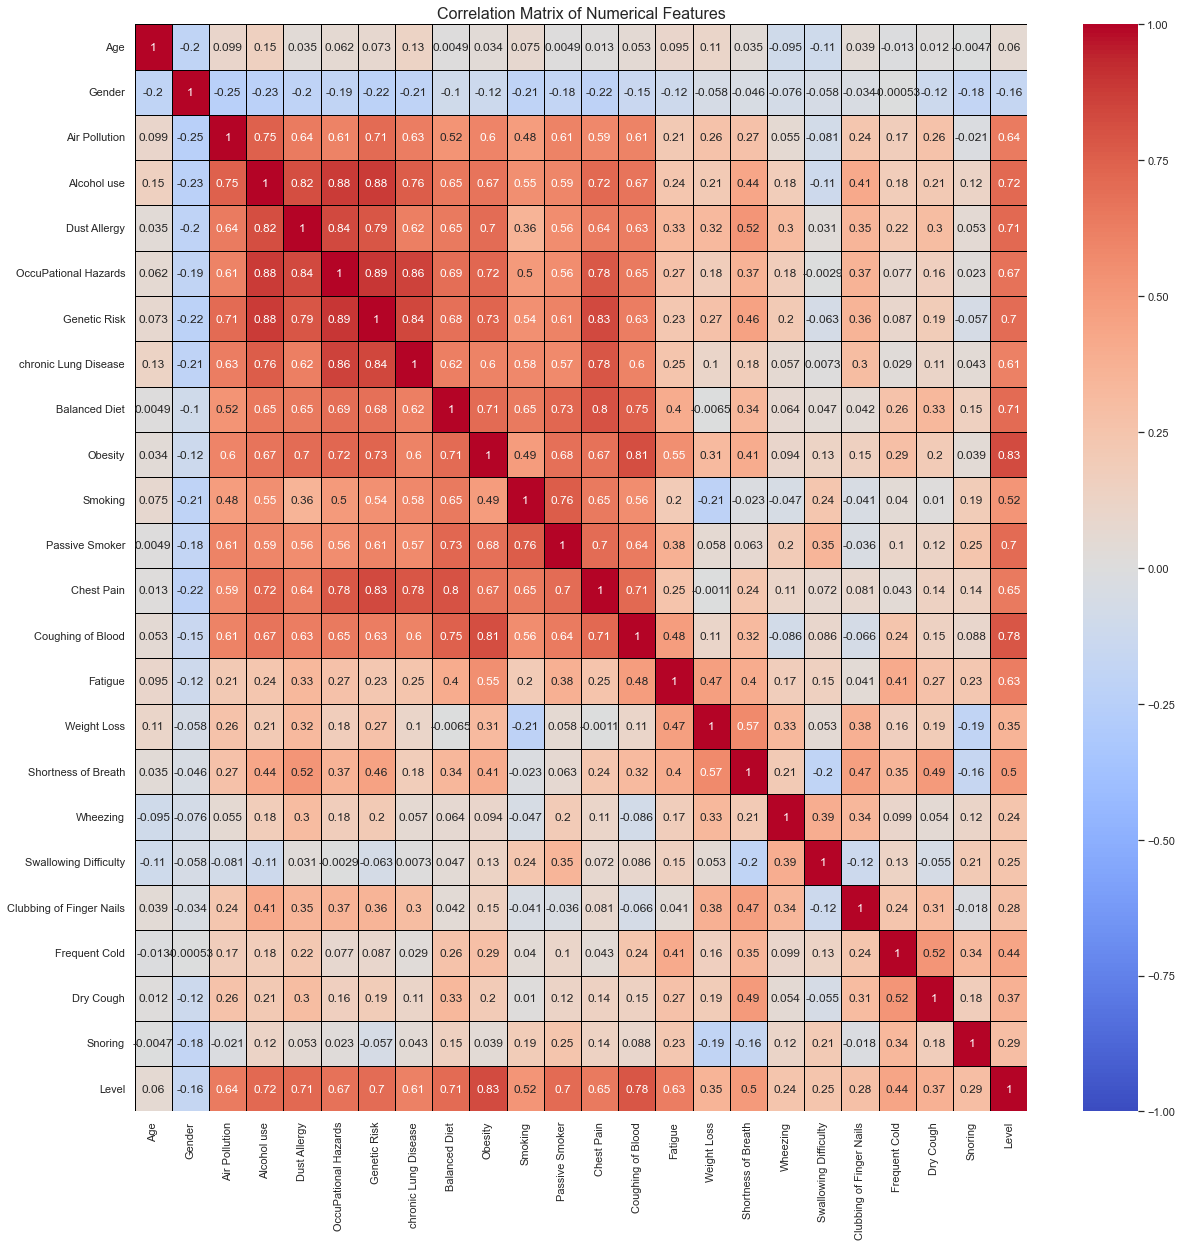

In [52]:

correlation_matrix = ds.corr()
import seaborn as sns
# Plot the correlation matrix using a heatmap
plt.figure(figsize=(20,20))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, linewidths=0.5, linecolor='black')
plt.title('Correlation Matrix of Numerical Features', fontsize=16)

In [30]:
ds.Level.unique()

array([1, 2, 3])

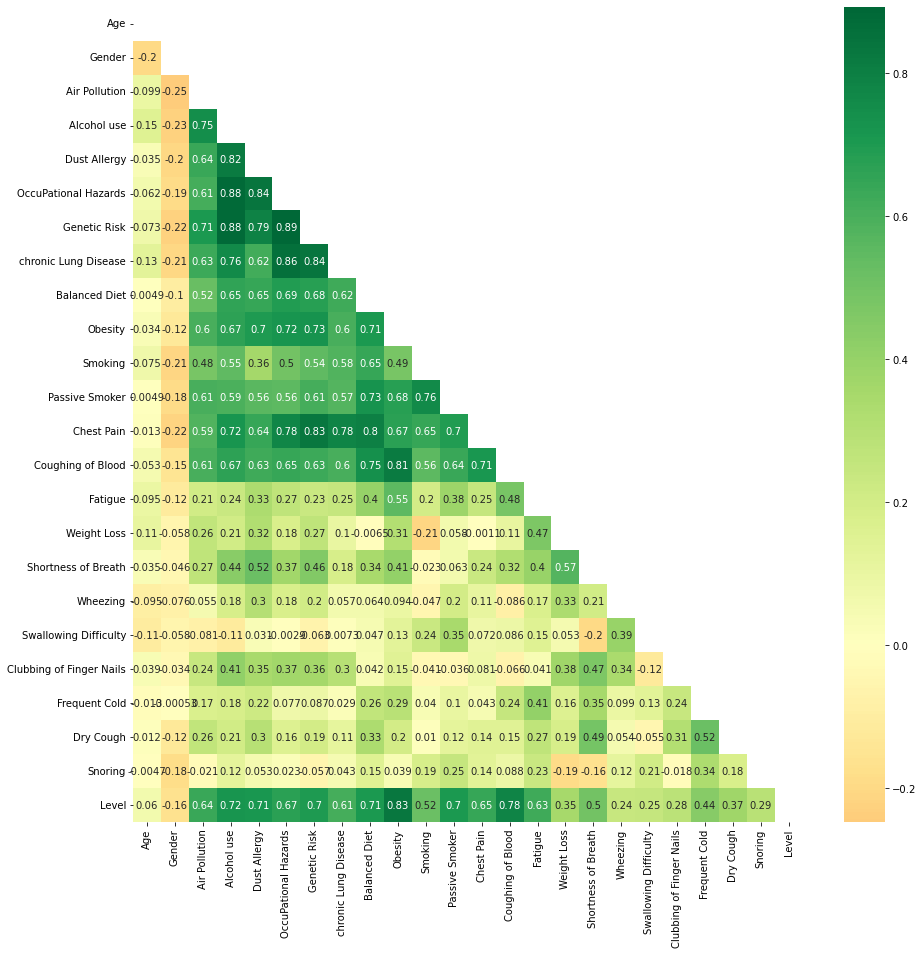

In [31]:
plt.figure(figsize=(15,15))
corr = ds.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
p=sns.heatmap(ds.corr(), annot=True,cmap='RdYlGn',center=0, mask = mask)

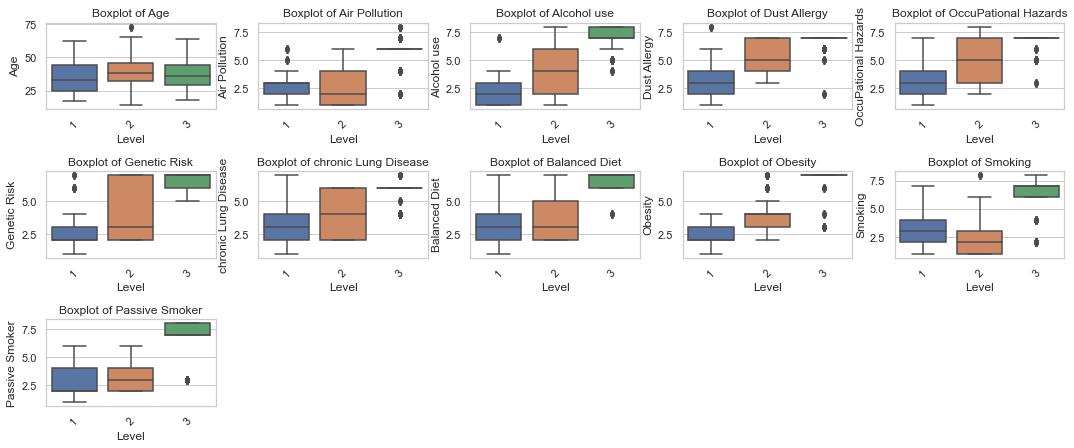

In [38]:
import seaborn as sns
import matplotlib.pyplot as plt

numerical_features = [
    'Age', 'Air Pollution', 'Alcohol use', 'Dust Allergy', 'OccuPational Hazards',
    'Genetic Risk', 'chronic Lung Disease', 'Balanced Diet', 'Obesity', 'Smoking',
    'Passive Smoker'
]


sns.set(style="whitegrid")

# Creating subplots for each numerical feature
plt.figure(figsize=(15, 10))
for i, feature in enumerate(numerical_features):
    plt.subplot(5, 5, i + 1)
    sns.boxplot(x='Level', y=feature, data=ds)
    plt.title(f'Boxplot of {feature}')
    plt.xticks(rotation=45)

# Adjusting subplot layout
plt.tight_layout()
plt.show()


<AxesSubplot:>

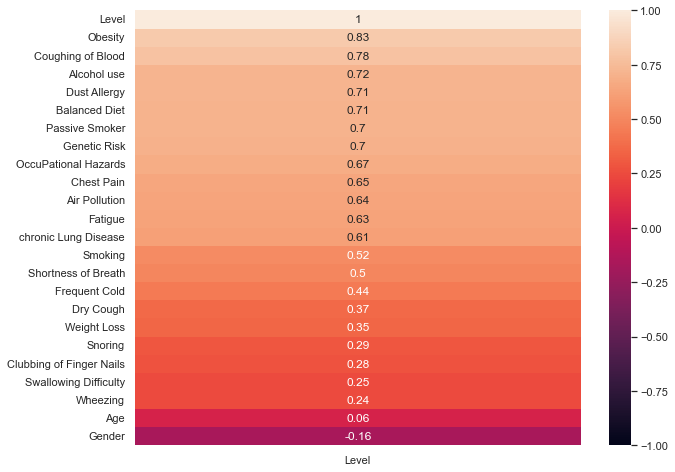

In [50]:
plt.figure(figsize=(10, 8))  
sns.heatmap(ds.corr()[['Level']].sort_values(by='Level', ascending=False), vmin=-1, vmax=1, annot=True)


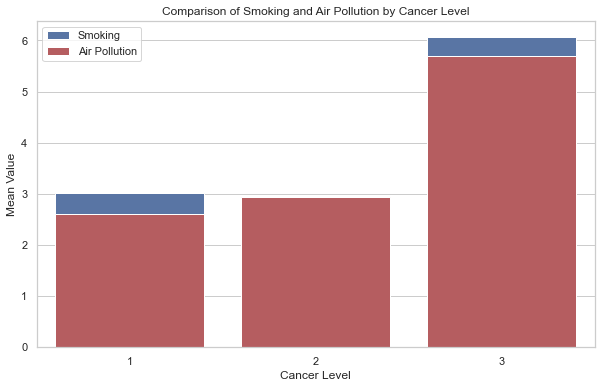

In [49]:
import seaborn as sns
import matplotlib.pyplot as plt


data_subset = ds[['Smoking', 'Air Pollution', 'Level']]

grouped_data = data_subset.groupby('Level').mean().reset_index()

plt.figure(figsize=(10, 6))
sns.set(style='whitegrid')
ax = sns.barplot(data=grouped_data, x='Level', y='Smoking', color='b', label='Smoking')
ax = sns.barplot(data=grouped_data, x='Level', y='Air Pollution', color='r', label='Air Pollution')
plt.title('Comparison of Smoking and Air Pollution by Cancer Level')
plt.xlabel('Cancer Level')
plt.ylabel('Mean Value')
plt.legend(loc='upper left')
plt.show()
